# Imports

In [2]:
# Data Handlingº
import numpy as np
import pandas as pd

# Vizz
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable
import missingno as msno

# Reading Data

In [3]:
data_path = '../data/'

In [4]:
part_1 = pd.read_csv(data_path+'data_part_1.csv', index_col=False); part_1 = part_1[part_1.columns[1:]] # Getting rid of idx col
part_2 = pd.read_csv(data_path+'data_part_2.csv', index_col=False); part_2 = part_2[part_2.columns[1:]] # Getting rid of idx col

In [5]:
print(part_1.shape); part_1.head()

(12180, 1741)


,Anthocyanin content (μg/cm²),Boron content (mg/cm²),C content (mg/cm²),Ca content (mg/cm²),Carotenoid content (μg/cm²),Cellulose (mg/cm²),Chl content (μg/cm²),Copper content (mg/cm²),EWT (mg/cm²),Fiber (mg/cm²),...,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
0,NaN,NaN,NaN,0.091526,NaN,NaN,34.047382,NaN,10.889923,NaN,...,0.035515,0.035214,0.034912,0.034611,0.034310,0.034008,0.033707,0.033405,0.033104,0.032803
1,NaN,NaN,NaN,0.038488,NaN,NaN,23.320021,NaN,10.270048,NaN,...,0.047333,0.047102,0.046871,0.046640,0.046409,0.046178,0.045947,0.045716,0.045485,0.045254
2,NaN,NaN,NaN,0.026577,NaN,NaN,27.098073,NaN,11.423791,NaN,...,0.027101,0.026860,0.026619,0.026379,0.026138,0.025897,0.025656,0.025415,0.025174,0.024933
3,NaN,NaN,NaN,0.013190,NaN,NaN,27.638014,NaN,13.132381,NaN,...,0.038942,0.038526,0.038110,0.037694,0.037278,0.036862,0.036446,0.036030,0.035614,0.035198
4,NaN,NaN,NaN,0.082163,NaN,NaN,23.159727,NaN,11.625371,NaN,...,0.049960,0.049475,0.048989,0.048504,0.048019,0.047534,0.047048,0.046563,0.046078,0.045593


In [6]:
print(part_2.shape); part_2.head()

(1115, 1758)


,Anthocyanin content (μg/cm²),Anthocyanin concentration (mg/g),Boron content (mg/cm²),Boron concentration (mg/g),C content (mg/cm²),C concentration (mg/g),Ca content (mg/cm²),Ca concentration (mg/g),Carotenoid content (μg/cm²),Carotenoid concentration (mg/g),...,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
0,NaN,NaN,NaN,NaN,NaN,NaN,0.275347,42.858184,NaN,NaN,...,0.027329,0.027078,0.026827,0.026576,0.026325,0.026073,0.025822,0.025571,0.025320,0.025069
1,NaN,NaN,NaN,NaN,NaN,NaN,0.072643,24.221242,NaN,NaN,...,0.027595,0.027208,0.026822,0.026435,0.026048,0.025662,0.025275,0.024888,0.024502,0.024115
2,NaN,NaN,NaN,NaN,NaN,NaN,0.181073,17.720565,NaN,NaN,...,0.010216,0.009961,0.009706,0.009450,0.009195,0.008940,0.008685,0.008430,0.008175,0.007919
3,NaN,NaN,NaN,NaN,NaN,NaN,0.040435,8.804204,NaN,NaN,...,0.060050,0.059363,0.058677,0.057991,0.057304,0.056618,0.055931,0.055245,0.054559,0.053872
4,NaN,NaN,NaN,NaN,NaN,NaN,0.012135,4.216834,NaN,NaN,...,0.053631,0.053125,0.052619,0.052113,0.051607,0.051101,0.050596,0.050090,0.049584,0.049078


In [7]:
#First dataset contains much more rows that second (arround 10 times more).

## Datasets have different number of columns (1741 vs 1758), checking which columns differ

In [8]:
set(part_1.columns).symmetric_difference(set(part_2.columns))

{'Anthocyanin concentration (mg/g)',
 'Boron concentration (mg/g)',
 'C concentration (mg/g)',
 'Ca concentration (mg/g)',
 'Carotenoid concentration (mg/g)',
 'Cellulose (mg/g)',
 'Chlorophyll concentration (mg/g)',
 'Copper concentration (mg/g)',
 'Fiber (mg/g)',
 'Lignin (mg/g)',
 'Magnesium concentration (mg/g)',
 'Manganese concentration (mg/g)',
 'N concentration (mg/g)',
 'NSC (mg/g)',
 'P concentration (mg/g)',
 'Potassium concentration (mg/g)',
 'Sulfur concentration (mg/g)'}

In [9]:
# It looks like concentrations are not present in the biggest dataframe.

# Joining datasets

In [10]:
data_df = pd.concat([part_1, part_2])
print(data_df.shape); data_df.head()

(13295, 1758)


,Anthocyanin content (μg/cm²),Boron content (mg/cm²),C content (mg/cm²),Ca content (mg/cm²),Carotenoid content (μg/cm²),Cellulose (mg/cm²),Chl content (μg/cm²),Copper content (mg/cm²),EWT (mg/cm²),Fiber (mg/cm²),...,Copper concentration (mg/g),Fiber (mg/g),Lignin (mg/g),Magnesium concentration (mg/g),Manganese concentration (mg/g),N concentration (mg/g),NSC (mg/g),P concentration (mg/g),Potassium concentration (mg/g),Sulfur concentration (mg/g)
0,NaN,NaN,NaN,0.091526,NaN,NaN,34.047382,NaN,10.889923,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.038488,NaN,NaN,23.320021,NaN,10.270048,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.026577,NaN,NaN,27.098073,NaN,11.423791,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.013190,NaN,NaN,27.638014,NaN,13.132381,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.082163,NaN,NaN,23.159727,NaN,11.625371,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Removing "concentration" features
data_df = data_df[part_1.columns]

In [12]:
# Distinguishing columns
input_cols = data_df.columns[20:]
target_cols = data_df.columns[:20]; target_cols

Index(['Anthocyanin content (μg/cm²)', 'Boron content (mg/cm²)',
       'C content (mg/cm²)', 'Ca content (mg/cm²)',
       'Carotenoid content (μg/cm²)', 'Cellulose (mg/cm²)',
       'Chl content (μg/cm²)', 'Copper content (mg/cm²)', 'EWT (mg/cm²)',
       'Fiber (mg/cm²)', 'LAI (m²/m²)', 'LMA (g/m²)', 'Lignin (mg/cm²)',
       'Magnesium content (mg/cm²)', 'Manganese content (mg/cm²)',
       'N content (mg/cm²)', 'NSC (mg/cm²)', 'Phosphorus content (mg/cm²)',
       'Potassium content (mg/cm²)', 'Sulfur content (mg/cm²)'],
      dtype='object')

In [13]:
# Some wavelengths are not included
input_cols_int = list(map(int, input_cols))
set(np.arange(400, 2451)).difference(input_cols_int)

{1351,
 1352,
 1353,
 1354,
 1355,
 1356,
 1357,
 1358,
 1359,
 1360,
 1361,
 1362,
 1363,
 1364,
 1365,
 1366,
 1367,
 1368,
 1369,
 1370,
 1371,
 1372,
 1373,
 1374,
 1375,
 1376,
 1377,
 1378,
 1379,
 1380,
 1381,
 1382,
 1383,
 1384,
 1385,
 1386,
 1387,
 1388,
 1389,
 1390,
 1391,
 1392,
 1393,
 1394,
 1395,
 1396,
 1397,
 1398,
 1399,
 1400,
 1401,
 1402,
 1403,
 1404,
 1405,
 1406,
 1407,
 1408,
 1409,
 1410,
 1411,
 1412,
 1413,
 1414,
 1415,
 1416,
 1417,
 1418,
 1419,
 1420,
 1421,
 1422,
 1423,
 1424,
 1425,
 1426,
 1427,
 1428,
 1429,
 1430,
 1801,
 1802,
 1803,
 1804,
 1805,
 1806,
 1807,
 1808,
 1809,
 1810,
 1811,
 1812,
 1813,
 1814,
 1815,
 1816,
 1817,
 1818,
 1819,
 1820,
 1821,
 1822,
 1823,
 1824,
 1825,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1832,
 1833,
 1834,
 1835,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1842,
 1843,
 1844,
 1845,
 1846,
 1847,
 1848,
 1849,
 1850,
 1851,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1861,
 1862,
 1863,

In [14]:
# 1351 - 1430
# 1801 - 2050

# Missing value anlalysis

In [15]:
missing_data = data_df.isna().sum() / data_df.shape[0]

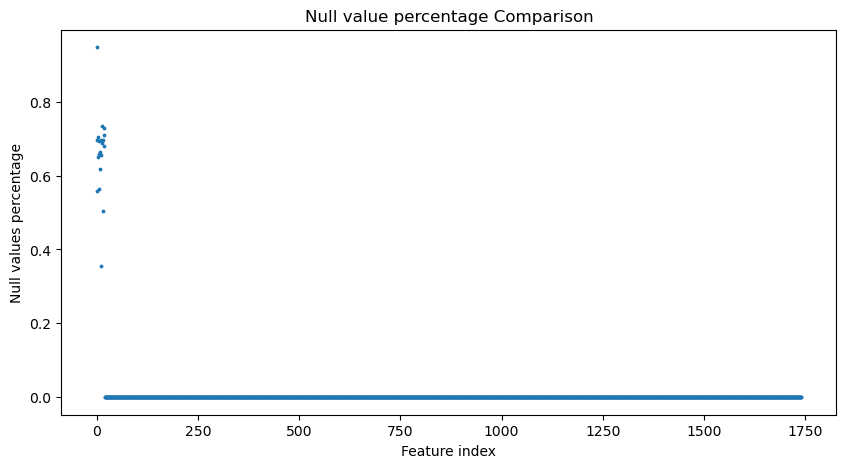

In [16]:
plt.subplots(figsize = (10, 5))
plt.scatter(x = np.arange(data_df.shape[1]), y = missing_data, s = 3)
plt.ylabel("Null values percentage")
plt.xlabel("Feature index")
plt.title("Null value percentage Comparison")
plt.show()

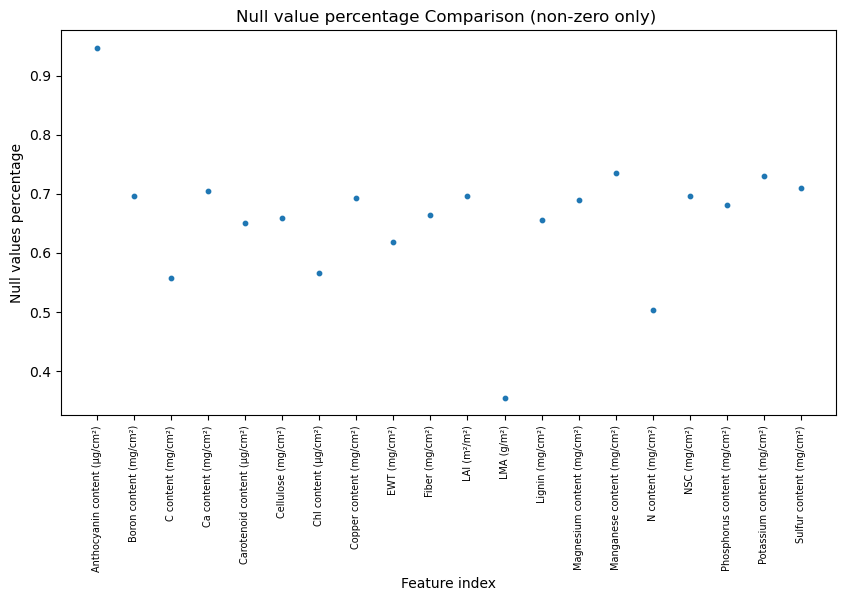

In [17]:
# Focusing only on target features
null_features = missing_data[target_cols]
plt.subplots(figsize = (10, 5))
plt.scatter(x = np.arange(len(null_features)), y = null_features , s = 10)
plt.xticks(np.arange(len(null_features)), null_features.index, rotation=90, fontsize = 7)
plt.ylabel("Null values percentage")
plt.xlabel("Feature index")
plt.title("Null value percentage Comparison (non-zero only) ")
plt.show()

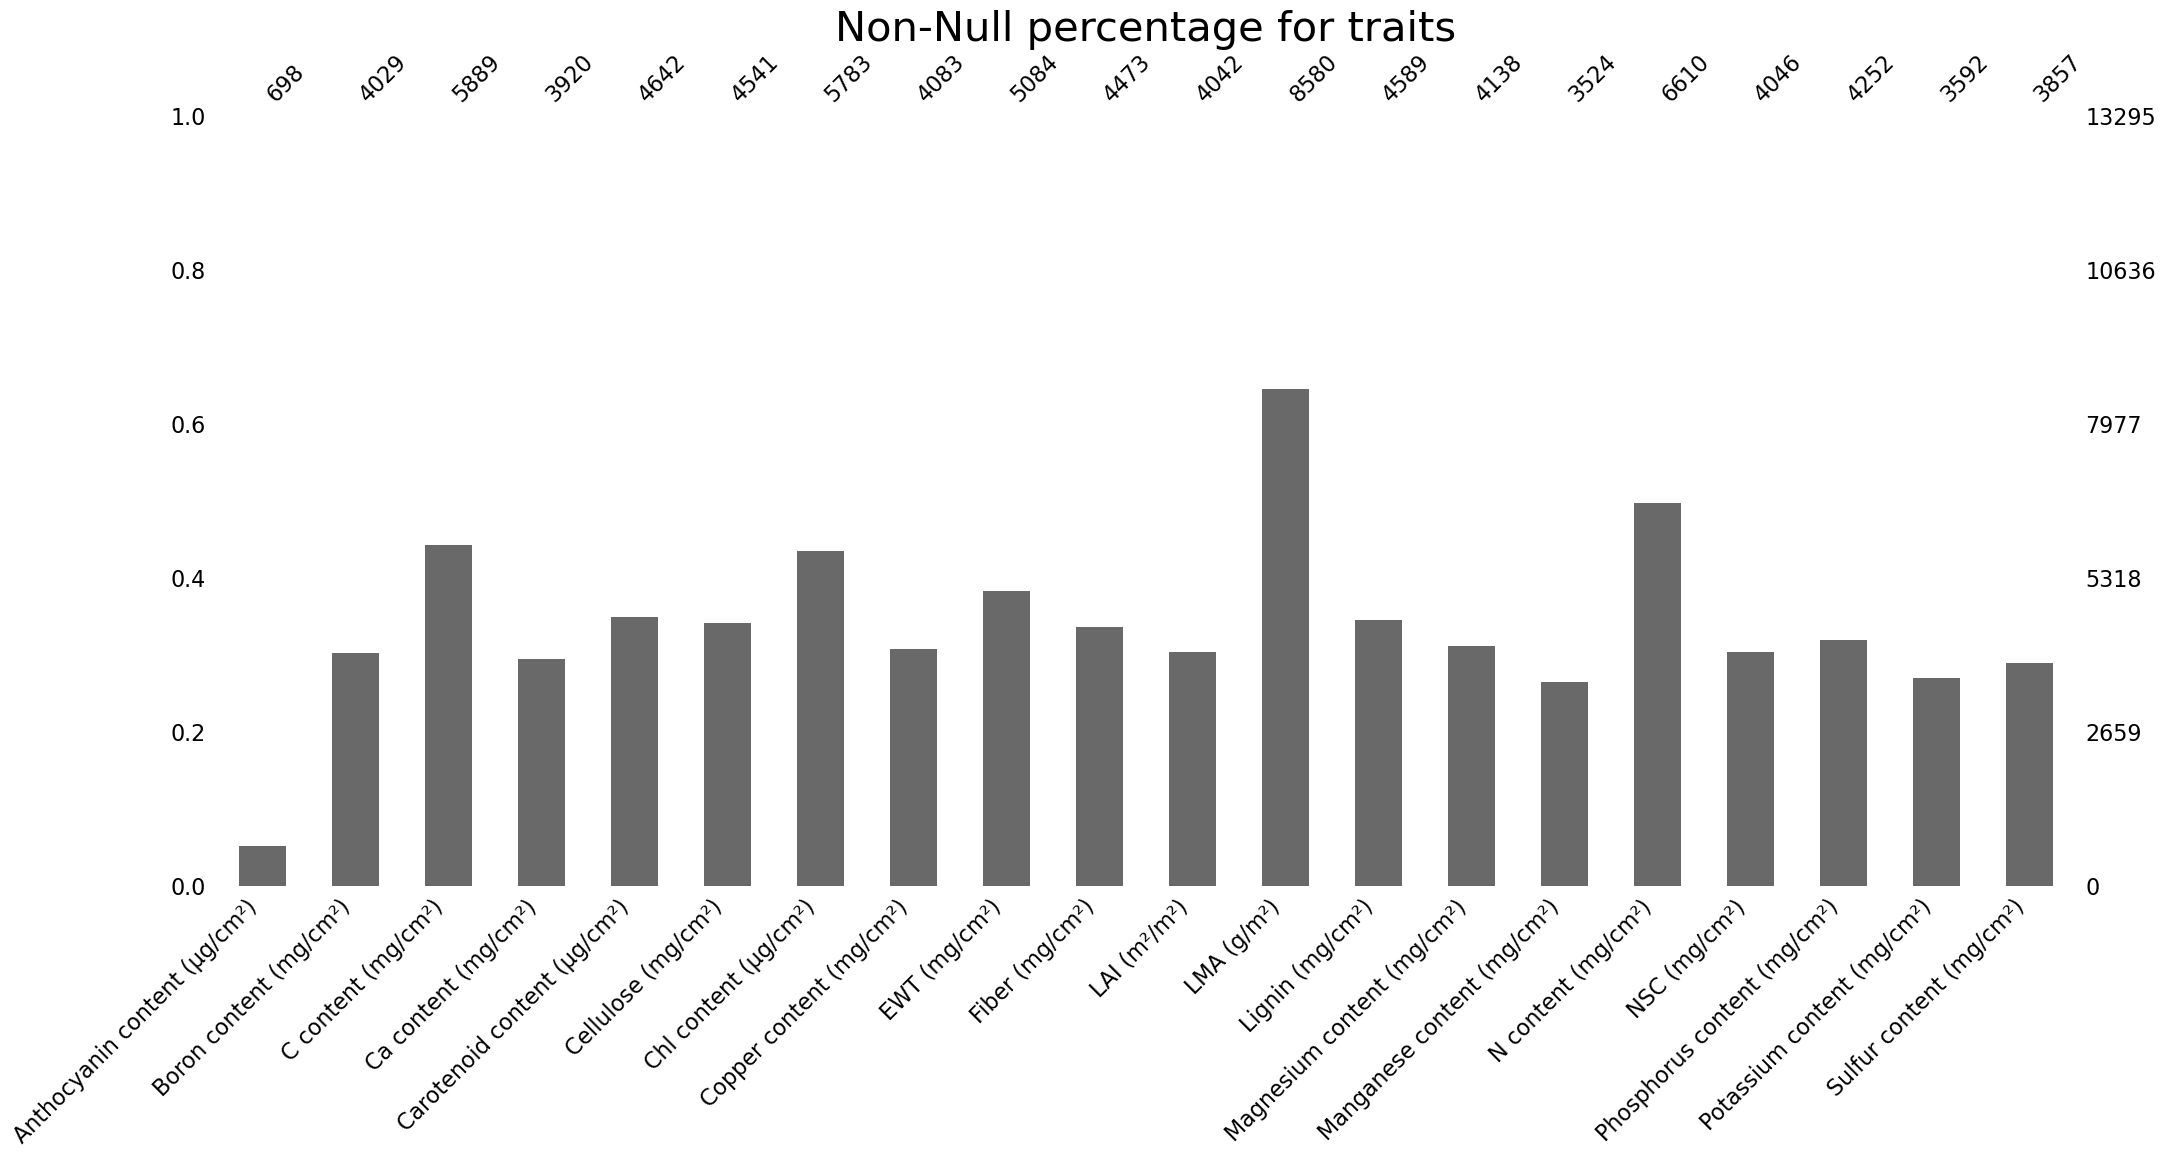

In [18]:
msno.bar( data_df[null_features.index])
plt.title("Non-Null percentage for traits", size=30)
plt.show()

In [19]:
# All traits null value percentage are arround 65%, with some outliers as LMA having ~35% or Anthocyanin content having ~95%.

<Figure size 640x480 with 0 Axes>

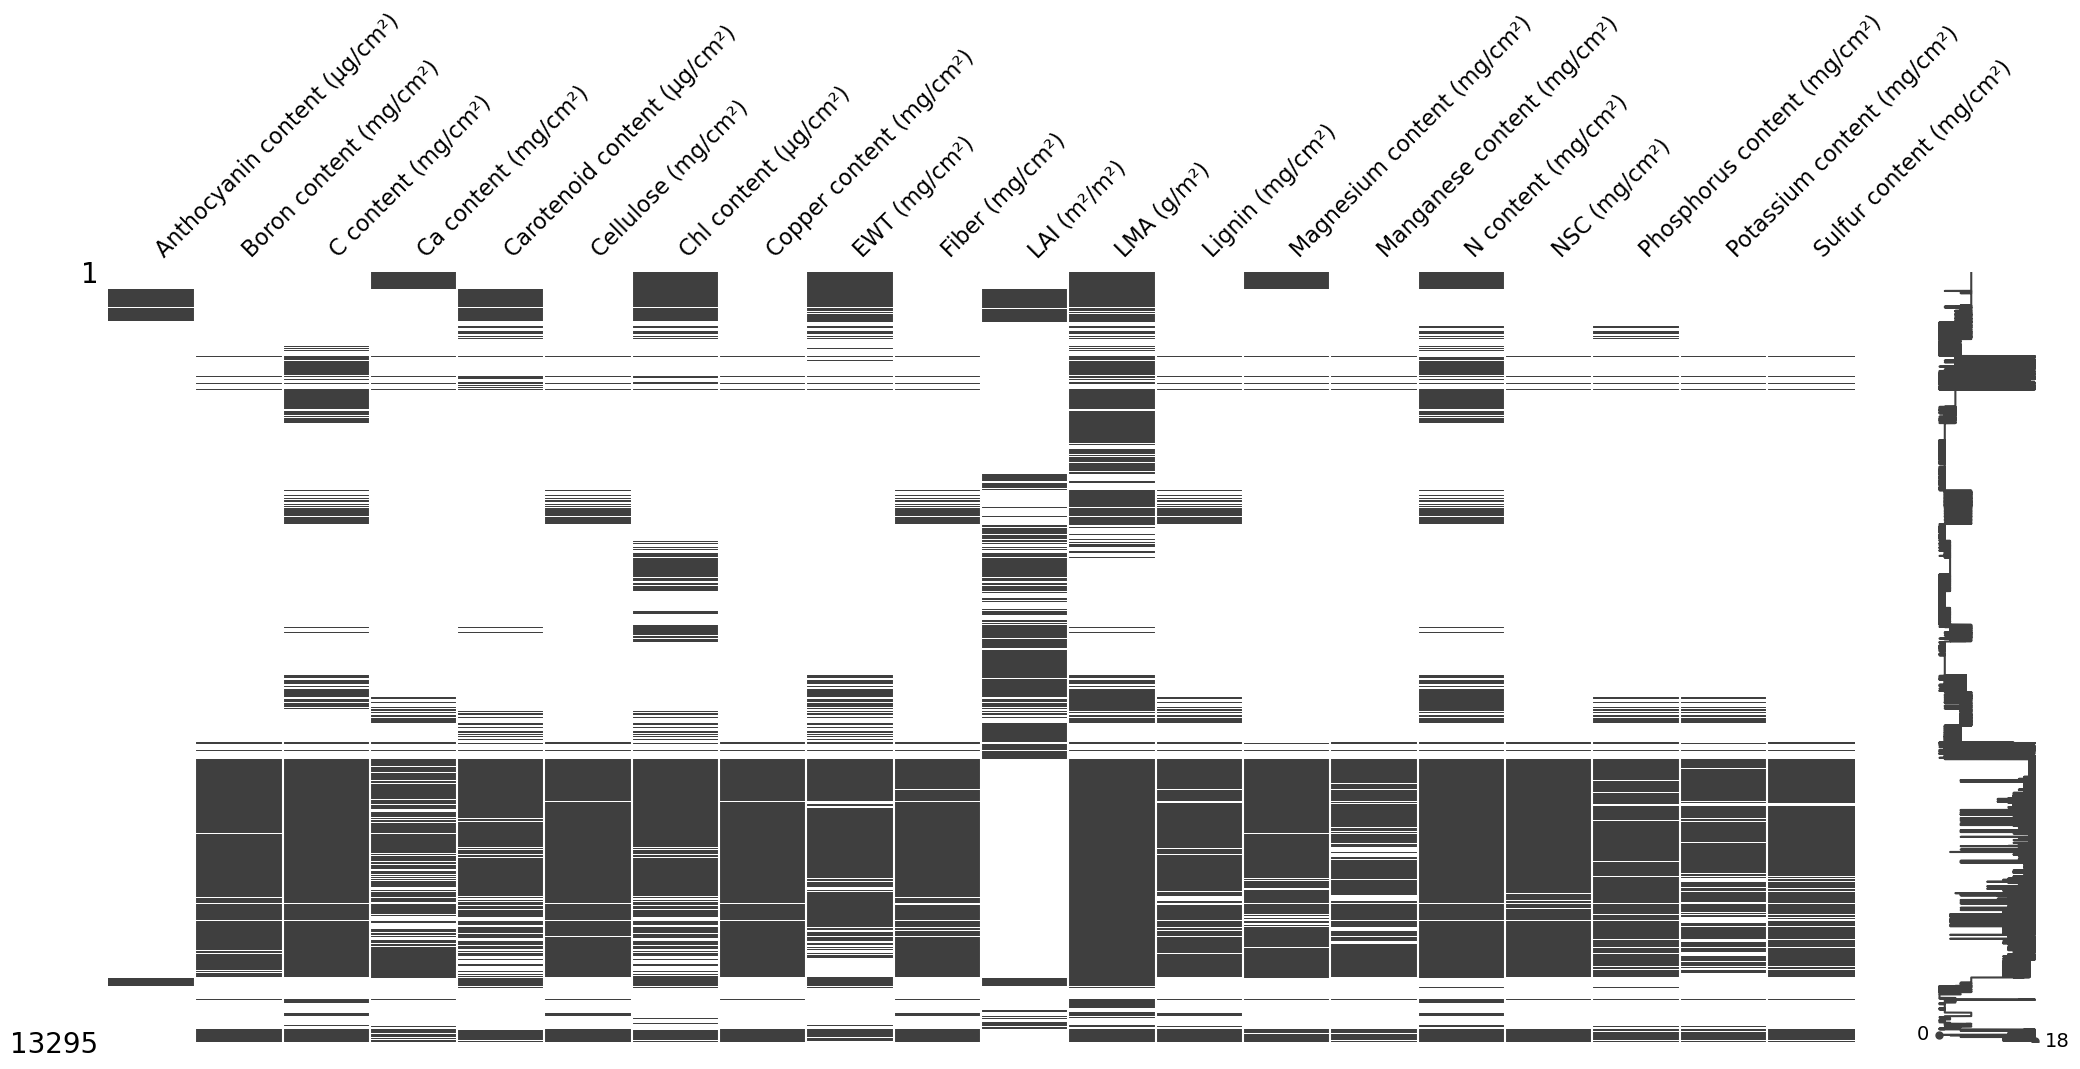

In [20]:
plt.figure()
msno.matrix( data_df[null_features.index] )
plt.show()

# Target visualization

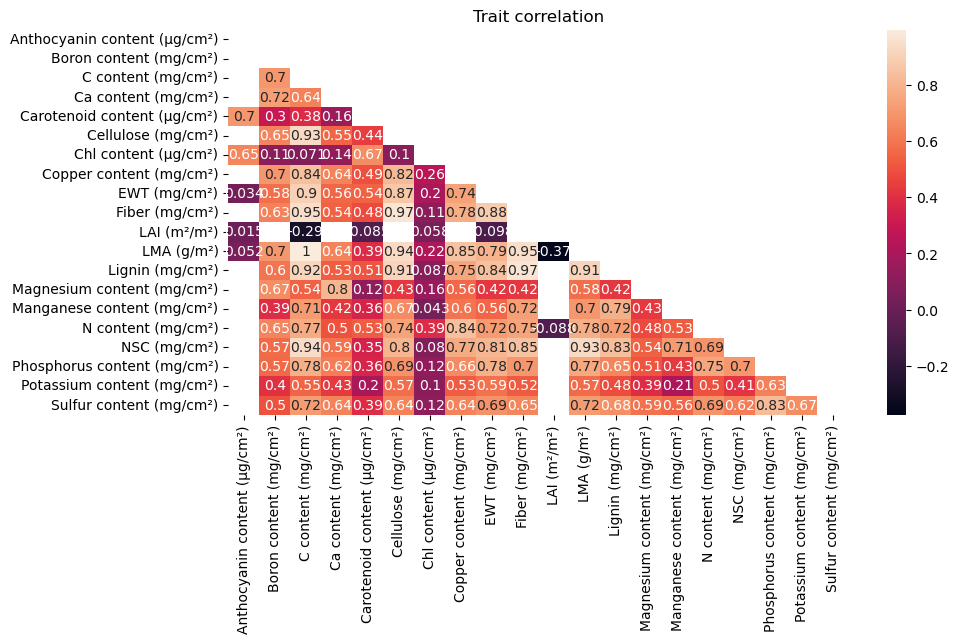

In [21]:
# Plotting correlation
plt.subplots(figsize=(10, 5))
corr = data_df[null_features.index].corr()

sns.heatmap( corr, annot=True, mask = np.triu(corr))
plt.title("Trait correlation")
plt.show()

In [35]:
target_cols.

Index(['Anthocyanin content (μg/cm²)', 'Boron content (mg/cm²)',
       'C content (mg/cm²)', 'Ca content (mg/cm²)',
       'Carotenoid content (μg/cm²)', 'Cellulose (mg/cm²)',
       'Chl content (μg/cm²)', 'Copper content (mg/cm²)', 'EWT (mg/cm²)',
       'Fiber (mg/cm²)', 'LAI (m²/m²)', 'LMA (g/m²)', 'Lignin (mg/cm²)',
       'Magnesium content (mg/cm²)', 'Manganese content (mg/cm²)',
       'N content (mg/cm²)', 'NSC (mg/cm²)', 'Phosphorus content (mg/cm²)',
       'Potassium content (mg/cm²)', 'Sulfur content (mg/cm²)'],
      dtype='object')

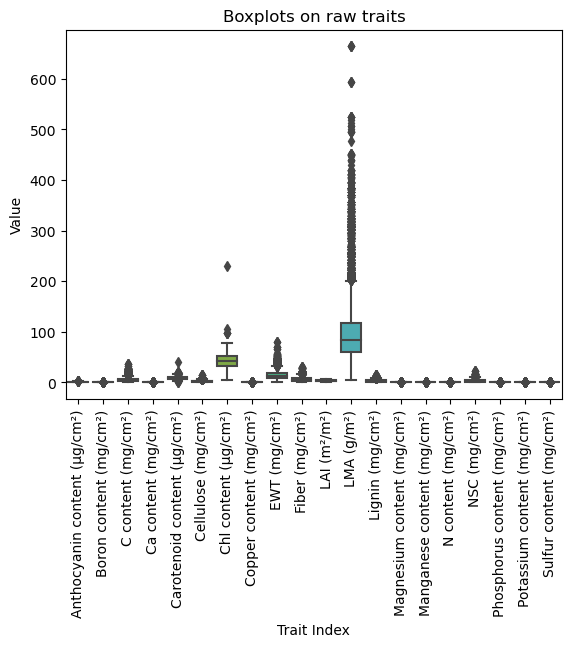

In [40]:
# Target boxplots
sns.boxplot(data = data_df[target_cols])
plt.xticks(np.arange(20), target_cols, rotation = 90)
plt.xlabel('Trait Index')
plt.ylabel('Value')
plt.title("Boxplots on raw traits")
plt.show()

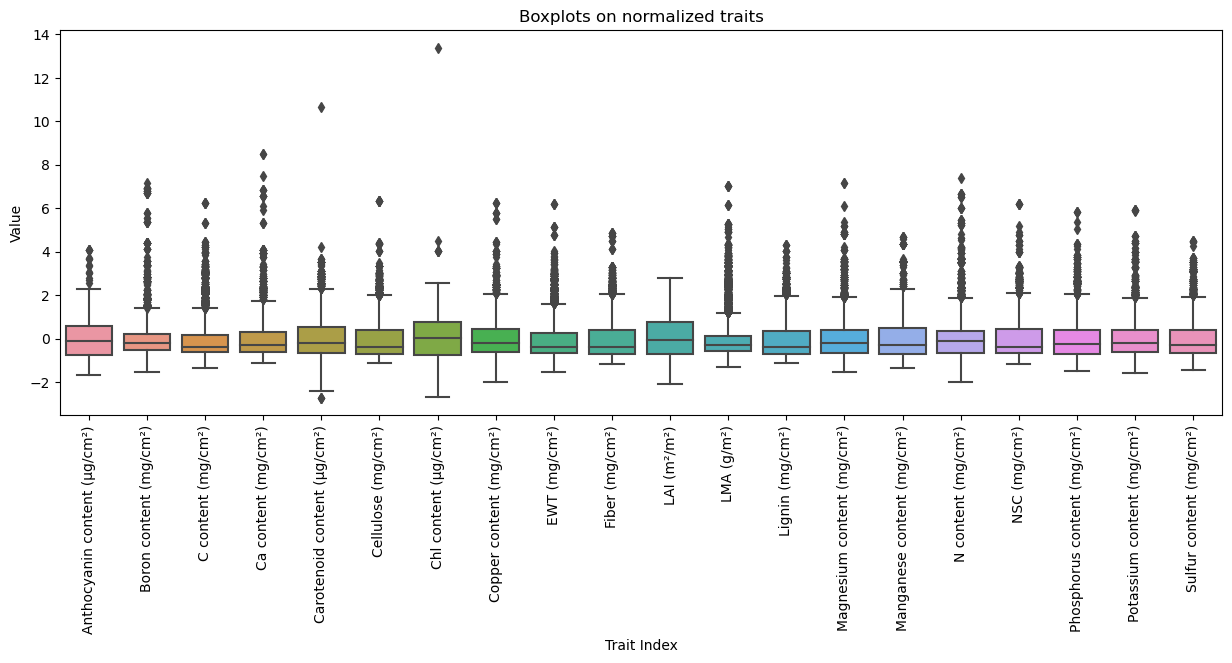

In [41]:
# Normalized values
data_df_zscore = (data_df-data_df.mean())/data_df.std()
plt.figure(figsize=(15,5))
sns.boxplot(data=data_df_zscore.iloc[:,0:20])
plt.xticks(np.arange(20), target_cols, rotation=90)
plt.xlabel('Trait Index')
plt.ylabel('Value')
plt.title("Boxplots on normalized traits")
plt.show()

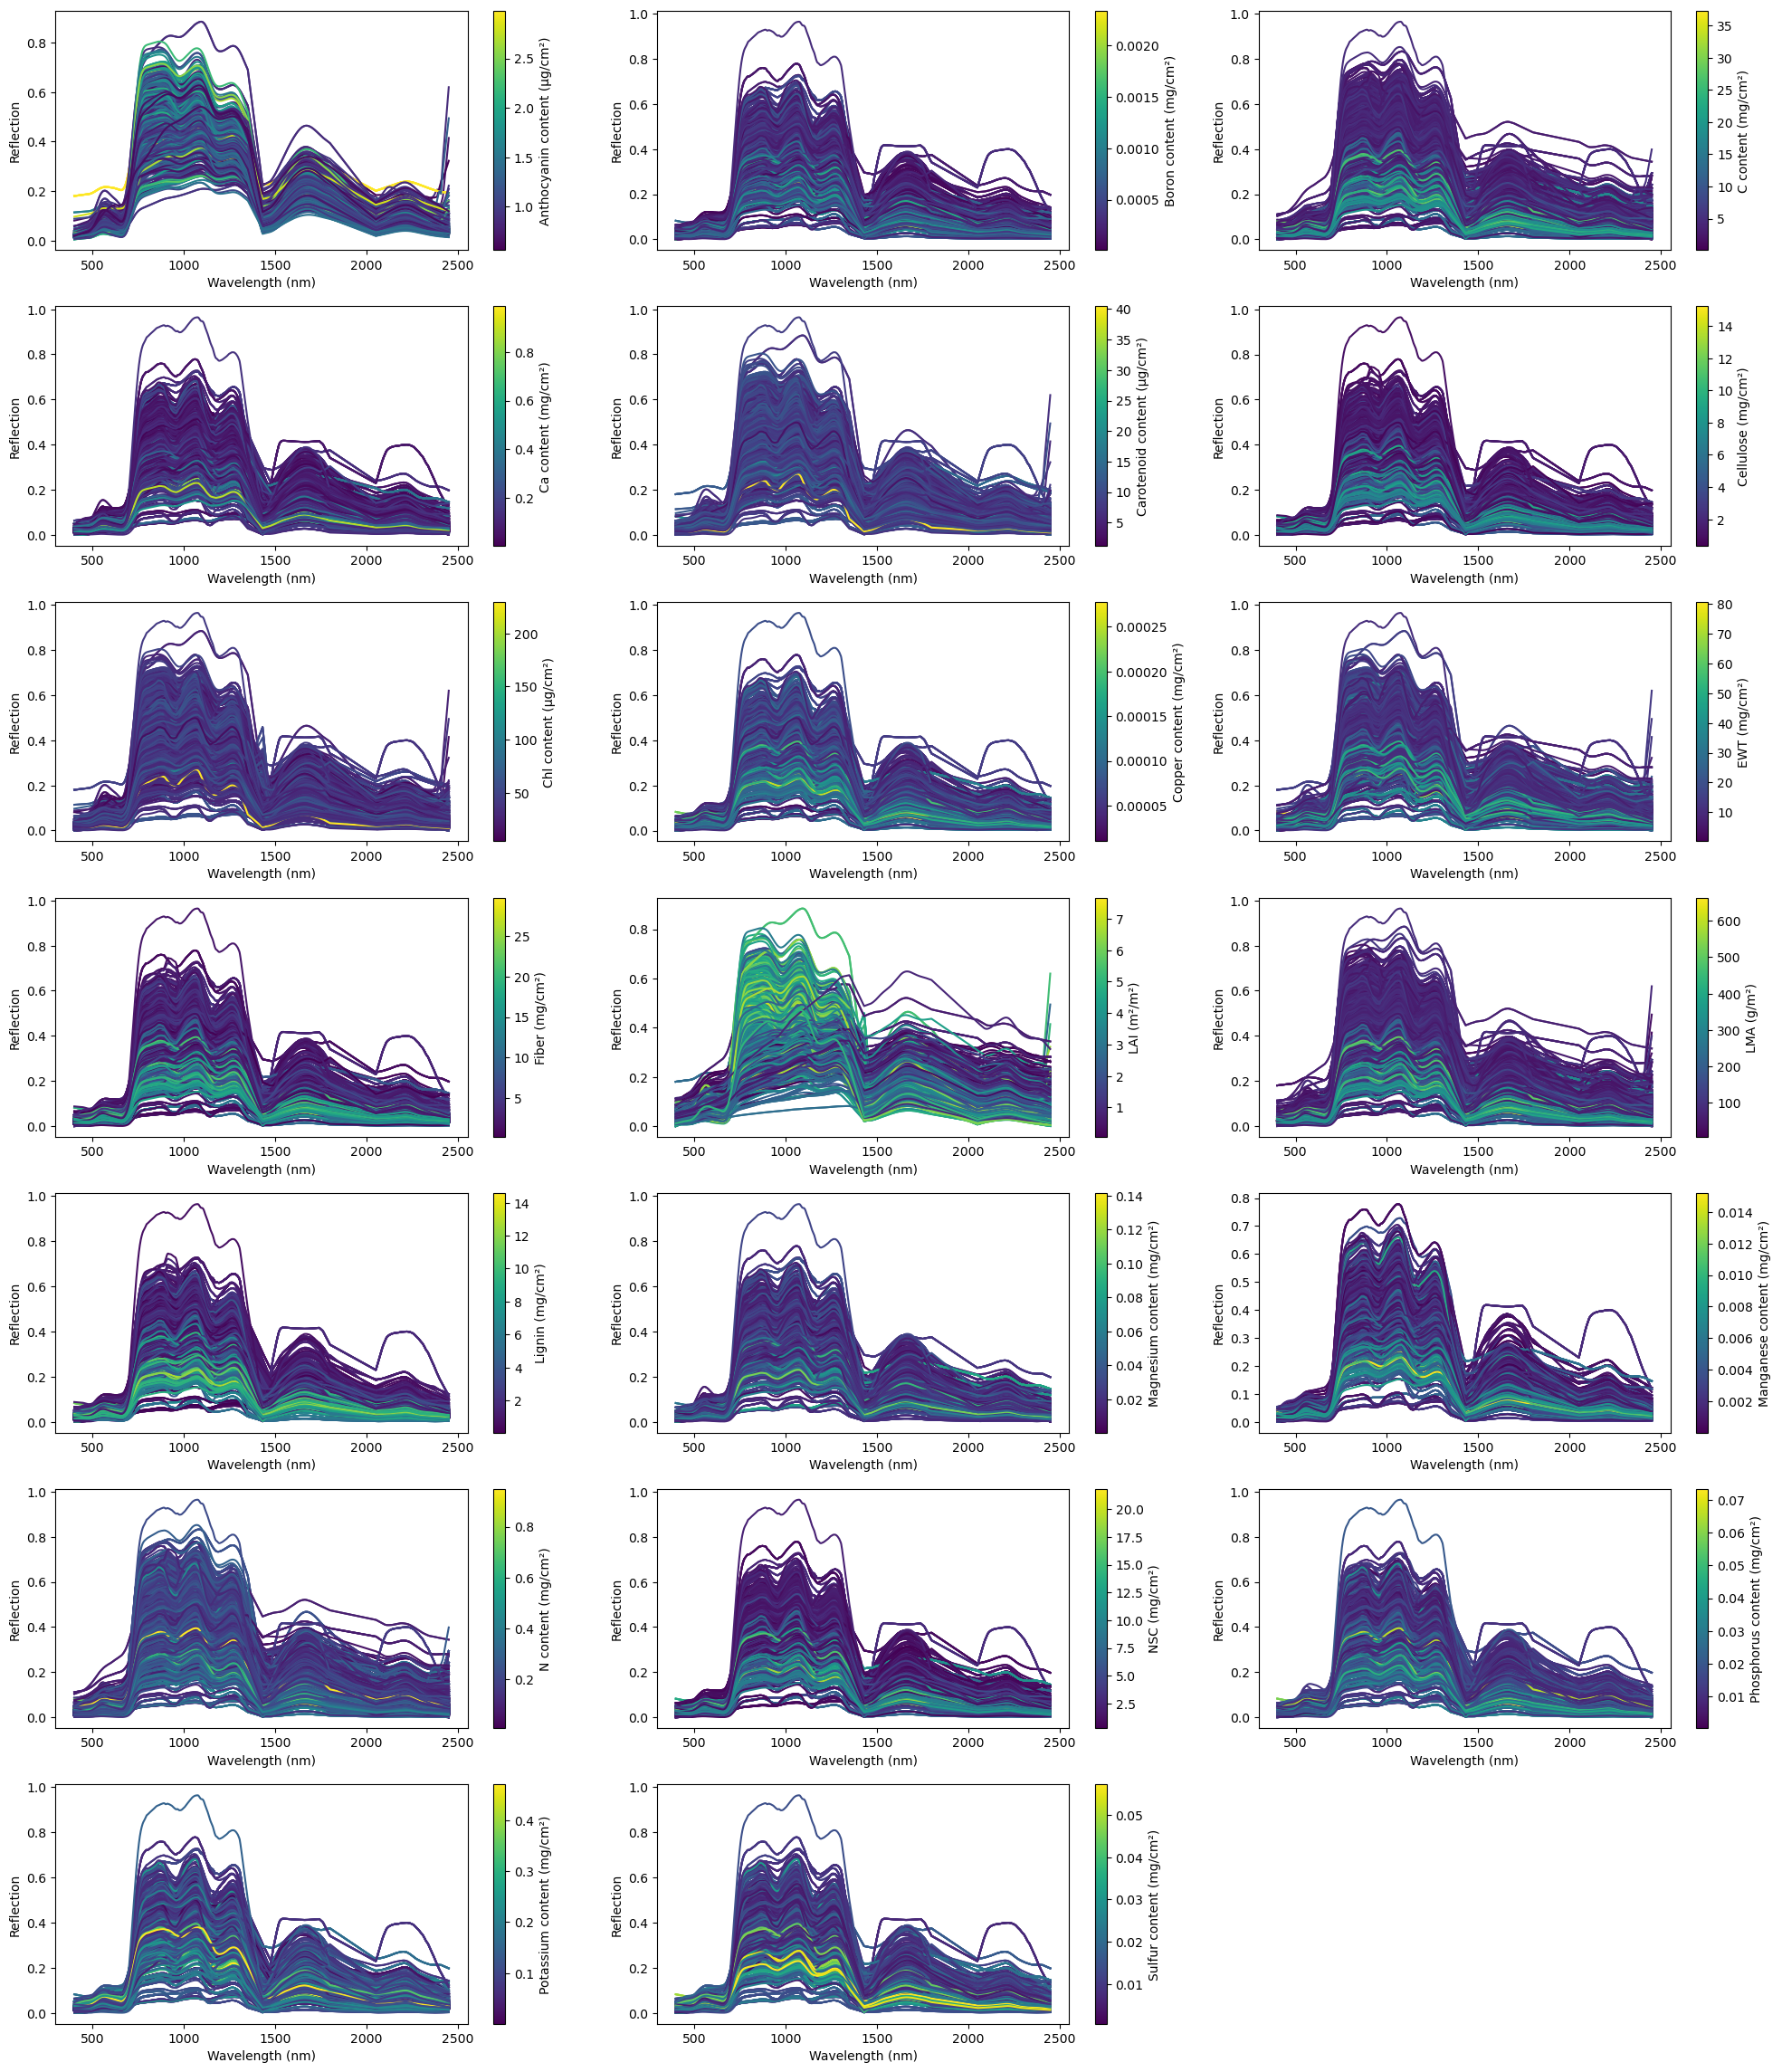

In [23]:
colormap = plt.get_cmap('viridis')
fig, ax = plt.subplots(7,3, figsize = (20, 23))

for idx_target, target in enumerate(target_cols):
    filtered_data = data_df[~data_df[target].isna()] # Keeping only non-na samples
    target_values = filtered_data[target].to_numpy() # Selecting the target values

    # To plot the colorbar
    norm = plt.Normalize(min(target_values), max(target_values))
    sm = ScalarMappable(cmap=colormap, norm=norm)
    
    # Plotting all rows
    for idx, row in filtered_data.reset_index(drop=True).iterrows():
        ax[idx_target // 3][idx_target % 3].plot(input_cols_int, row[input_cols], c = sm.to_rgba(target_values[idx]) )
        
    # Adding plot information    
    plt.colorbar(sm, ax = ax[idx_target // 3][idx_target % 3], label=target)
    ax[idx_target // 3][idx_target % 3].set_xlabel("Wavelength (nm)")
    ax[idx_target // 3][idx_target % 3].set_ylabel("Reflection")
    
ax[6, 2].axis('off')
plt.tight_layout()
plt.show()